In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm # para barra de progreso
import time
from sympy import latex # para pasar en latex

# se pone al inicio por si se interrumpe la ejecución para que no te salga raro en la siguiente ejecución
# barra_progreso.close()

# Matriz del centro NV 
$$ \mathcal{H}/h = D(S_z^{2} - \frac{S(S+1)}{3}) + E(S_x^{2} - S_y^{2}) + \gamma B\cdot S $$

donde:
\begin{align}
D &= 2.87 \; GHz & \gamma &= \frac{g_e \mu_B}{h} = 28 \;GHz/T \\
E &= 5 \; MHz & S&=1
\end{align}

Los operadores de spin 1
\begin{align}
S_x &= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0& 1& 0 \end{pmatrix} &
S_y &= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & -i & 0 \\ i & 0 & -i \\ 0& i& 0 \end{pmatrix} &
S_z &= \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -1 \end{pmatrix}
\end{align}

Se usa los autovectores de $S_z:  \quad \{ |1\rangle = |+1\rangle\;;\; |2\rangle = |0\rangle\;;\; |3\rangle = |-1\rangle \}$



In [2]:
# Escribimos los operadores a usar
from sympy import Matrix, Rational, sqrt, I

# Los operadores espín S=1
S_x = 1/sqrt(2)*Matrix([[0,1,0],[1,0,1],[0,1,0]])
S_y = 1/sqrt(2)*Matrix([[0,-I,0],[I,0,-I],[0,I,0]])
S_z = Matrix([[1,0,0],[0,0,0],[0,0,-1]])

In [3]:
# expresamos el Hamiltoniano
from sympy import symbols, eye
D,E,gamma,B_x,B_y,B_z = symbols('D E \gamma B_x B_y B_z', real=True)

H = D*(S_z**2 - Rational(2,3)*eye(3)) + E*(S_x**2 - S_y**2) + gamma*(B_x*S_x + B_y*S_y + B_z*S_z)
print("El hamiltoniano del centro NV es:")
display(H)
print(latex(H))

El hamiltoniano del centro NV es:


Matrix([
[                        B_z*\gamma + D/3, \gamma*(sqrt(2)*B_x/2 - sqrt(2)*I*B_y/2),                                        E],
[\gamma*(sqrt(2)*B_x/2 + sqrt(2)*I*B_y/2),                                   -2*D/3, \gamma*(sqrt(2)*B_x/2 - sqrt(2)*I*B_y/2)],
[                                       E, \gamma*(sqrt(2)*B_x/2 + sqrt(2)*I*B_y/2),                        -B_z*\gamma + D/3]])

\left[\begin{matrix}B_{z} \gamma + \frac{D}{3} & \gamma \left(\frac{\sqrt{2} B_{x}}{2} - \frac{\sqrt{2} i B_{y}}{2}\right) & E\\\gamma \left(\frac{\sqrt{2} B_{x}}{2} + \frac{\sqrt{2} i B_{y}}{2}\right) & - \frac{2 D}{3} & \gamma \left(\frac{\sqrt{2} B_{x}}{2} - \frac{\sqrt{2} i B_{y}}{2}\right)\\E & \gamma \left(\frac{\sqrt{2} B_{x}}{2} + \frac{\sqrt{2} i B_{y}}{2}\right) & - B_{z} \gamma + \frac{D}{3}\end{matrix}\right]


## Ecuación caracteristica del Hamiltoniano

In [4]:
# Ecuación secular
from sympy import simplify
caracteristica_ecuacion = H.charpoly()
display(caracteristica_ecuacion)
print(latex(caracteristica_ecuacion))

PurePoly(lambda**3 + (-B_x**2*\gamma**2 - B_y**2*\gamma**2 - B_z**2*\gamma**2 - D**2/3 - E**2)*lambda + B_x**2*D*\gamma**2/3 - B_x**2*E*\gamma**2 + B_y**2*D*\gamma**2/3 + B_y**2*E*\gamma**2 - 2*B_z**2*D*\gamma**2/3 + 2*D**3/27 - 2*D*E**2/3, lambda, domain='QQ[B_x,B_y,B_z,D,E,\gamma]')

\operatorname{PurePoly}{\left( \lambda^{3} + \left(- B_{x}^{2} \gamma^{2} - B_{y}^{2} \gamma^{2} - B_{z}^{2} \gamma^{2} - \frac{D^{2}}{3} - E^{2}\right) \lambda + \frac{B_{x}^{2} D \gamma^{2}}{3} - B_{x}^{2} E \gamma^{2} + \frac{B_{y}^{2} D \gamma^{2}}{3} + B_{y}^{2} E \gamma^{2} - \frac{2 B_{z}^{2} D \gamma^{2}}{3} + \frac{2 D^{3}}{27} - \frac{2 D E^{2}}{3}, \lambda, domain=\mathbb{Q}\left[B_{x}, B_{y}, B_{z}, D, E, \gamma\right] \right)}


## Un primer estudio / Calculo de autovalores y autovectores
El campo magnetico en coordenadas esfericas
\begin{align}
B_x &= B\sin(\theta)\cos(\varphi) \\
B_y &= B\sin(\theta)\sin(\varphi) \\
B_z &= B\cos(\theta) 
\end{align}

In [5]:
''' 
gamma_eval = mu_B*g_e/h 
donde:
- mu_B = 9.27*10*^{-24} J.T^{-1}
- g_e = 2.0023 
- h = 6.626* 10^{-34} J.s 

Haz el calculo y te saldra aprox 28 Gigas
'''
E_eval = 5*10**(-3) # En nanodamiantes usualmente puede variar entre 5-20 MHz / lo pasas a GHz
D_eval = 2.87 # En 2.87 GHz 
gamma_eval = 28 # En 28 GHz/T .... (Haz el calculo con )


### Reemplazando en el hamiltoniano 
Beval = 1*10**(-3)
theta = 0*(np.pi/180) # angulo de latitud 
phi = 0*(np.pi/180) # angulo azimutal
# Reemplazar Bx, By, Bz
Bx_eval = Beval*np.sin(theta)*np.cos(phi)
By_eval = Beval*np.sin(theta)*np.sin(phi)
Bz_eval = Beval*np.cos(theta)


E_eval = 5*10**(-3)
Heval = H.subs({D:D_eval, E:E_eval, gamma:gamma_eval, B_x:Bx_eval, B_y:By_eval, B_z:Bz_eval})
print("Matriz a resolver")
display(Heval)

print("Autovalores/Multiplicidad/Autovectores:")
vectores = Heval.eigenvects()
display(vectores)
print("Ordenando de menor a mayor los autovalores:")
vectores = sorted(vectores)
display(vectores)

Matriz a resolver


Matrix([
[0.984666666666667,                 0,             0.005],
[                0, -1.91333333333333,                 0],
[            0.005,                 0, 0.928666666666667]])

Autovalores/Multiplicidad/Autovectores:


[(-1.91333333333333,
  1,
  [Matrix([
   [   0],
   [-1.0],
   [   0]])]),
 (0.985109591973322,
  1,
  [Matrix([
   [ -0.996099286092627],
   [                  0],
   [-0.0882395163504367]])]),
 (0.928223741360011,
  1,
  [Matrix([
   [-0.0882395163504367],
   [                  0],
   [  0.996099286092627]])])]

Ordenando de menor a mayor los autovalores:


[(-1.91333333333333,
  1,
  [Matrix([
   [   0],
   [-1.0],
   [   0]])]),
 (0.928223741360011,
  1,
  [Matrix([
   [-0.0882395163504367],
   [                  0],
   [  0.996099286092627]])]),
 (0.985109591973322,
  1,
  [Matrix([
   [ -0.996099286092627],
   [                  0],
   [-0.0882395163504367]])])]

## Segundo estudio / solución simbolica con $B_x = 0$ y $B_y = 0$ 

In [6]:
### Reemplazando en el hamiltoniano 
Heval = H.subs({B_x:0,B_y:0})
print("Matriz a resolver:")
display(Heval)

autovectores = Heval.eigenvects()

print("Autovalor / Autovector")
for i,autovector in enumerate(autovectores):
    print(f"\033[4m{i} autovalor\033[0m")
    display(autovector[0],autovector[2][0])

Matriz a resolver:


Matrix([
[B_z*\gamma + D/3,      0,                 E],
[               0, -2*D/3,                 0],
[               E,      0, -B_z*\gamma + D/3]])

Autovalor / Autovector
0 autovalor


-2*D/3

Matrix([
[0],
[1],
[0]])

1 autovalor


D/3 - sqrt(B_z**2*\gamma**2 + E**2)

Matrix([
[(D/3 - sqrt(B_z**2*\gamma**2 + E**2))/E + (3*B_z*\gamma - D)/(3*E)],
[                                                                 0],
[                                                                 1]])

2 autovalor


D/3 + sqrt(B_z**2*\gamma**2 + E**2)

Matrix([
[(D/3 + sqrt(B_z**2*\gamma**2 + E**2))/E + (3*B_z*\gamma - D)/(3*E)],
[                                                                 0],
[                                                                 1]])

In [7]:
### Reemplazando en el hamiltoniano 
Heval = H.subs({B_x:0,B_y:0})
print("Matriz a resolver:")
display(print(latex(Heval)))

autovectores = Heval.eigenvects()

print("Autovalor / Autovector")
for i,autovector in enumerate(autovectores):
    print(f"\033[4m{i} autovalor\033[0m")
    display(print(latex(autovector[0])),print(latex(autovector[2][0])))

Matriz a resolver:
\left[\begin{matrix}B_{z} \gamma + \frac{D}{3} & 0 & E\\0 & - \frac{2 D}{3} & 0\\E & 0 & - B_{z} \gamma + \frac{D}{3}\end{matrix}\right]


None

Autovalor / Autovector
0 autovalor
- \frac{2 D}{3}
\left[\begin{matrix}0\\1\\0\end{matrix}\right]


None

None

1 autovalor
\frac{D}{3} - \sqrt{B_{z}^{2} \gamma^{2} + E^{2}}
\left[\begin{matrix}\frac{\frac{D}{3} - \sqrt{B_{z}^{2} \gamma^{2} + E^{2}}}{E} + \frac{3 B_{z} \gamma - D}{3 E}\\0\\1\end{matrix}\right]


None

None

2 autovalor
\frac{D}{3} + \sqrt{B_{z}^{2} \gamma^{2} + E^{2}}
\left[\begin{matrix}\frac{\frac{D}{3} + \sqrt{B_{z}^{2} \gamma^{2} + E^{2}}}{E} + \frac{3 B_{z} \gamma - D}{3 E}\\0\\1\end{matrix}\right]


None

None

# Frecuencias de transición vs campo magnetico alineado / $B_x = B_y = 0$
Para este caso tenemos 
$\theta = \varphi= 0$

In [8]:
from sympy import re

def frecuencias_calc(B_ini=-500*10**(-6),B_fin=500*10**(-6),pasos=100,theta=2*(np.pi/180),phi = 0*(np.pi/180),E_eval = 2*10**(-3)):
    '''
    Esta función retorna 3 arrays 
    1er array : El campo magnetico 
    2do array : Las frecuencias menor de transición
    3er array : Las frecuencias mayor de transición
    '''
    
    array1 = []
    array2 = []
    array3 = []
    
    for Bvalor in np.linspace(B_ini,B_fin,pasos):
        # Variables 
        Beval = Bvalor 
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        # evaluando
        Heval = H.subs({D:D_eval, E:E_eval, gamma:gamma_eval, B_x:Bx_eval, B_y:By_eval, B_z:Bz_eval}) # reemplazando
    
        # calculando autoenergias
        eigenvalores =  Heval.eigenvals()
        # Convertir los autovalores a un array
        '''
        tengo que usar la función ''re'' y no "np.real" porque los valores de autovalores son sympy 
        con esto me aseguro de solo sacar la parte real, aunque el hamiltoniano es hermitico en el algoritmo de sympy 
        te puede salir complejo de parte complejo muy bajo  
        '''

        lista = [re(val) for val in eigenvalores.keys()]
        autovalores = np.sort(lista) # ordenamos la lista
    
        # formamos una lista reducida
        frecuencias_transicion = [autovalores[2]-autovalores[0], autovalores[1]-autovalores[0]]
        
        np.array( array1.append(Bvalor) )
        np.array( array2.append(frecuencias_transicion[0]) )
        np.array( array3.append(frecuencias_transicion[1]) )
        
    return np.array([array1,array2,array3])

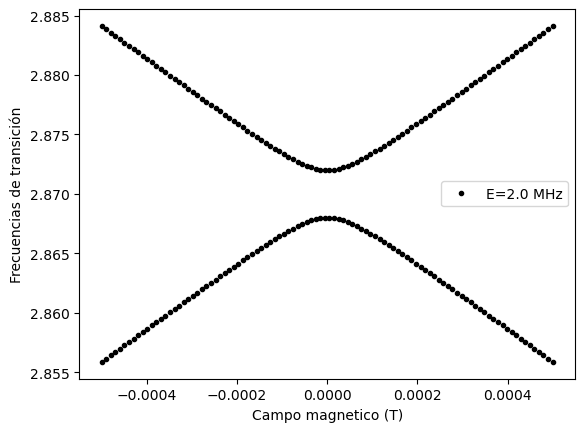

In [9]:
E_eval_valor = 2*10**(-3)
frecuencias = frecuencias_calc(B_ini=-500*10**(-6),B_fin=500*10**(-6),pasos=100,theta=2*(np.pi/180),
                               phi = 0*(np.pi/180),E_eval = E_eval_valor)

plt.plot(frecuencias[0],frecuencias[2],'.k')   
plt.plot(frecuencias[0],frecuencias[1],'.k')

plt.ylabel('Frecuencias de transición')
plt.xlabel('Campo magnetico (T)')
# plt.title('Figura 1')
plt.legend([f'E={E_eval_valor*10**(3)} MHz'])
# plt.savefig('frecuencia_vs_campo-magnetico_E=2MHz.png') ### 
plt.show()

# Estudio de autoenergias con campo magnetico no alineado

## Autoenergias vs campo magnetico / $\theta \neq0$ y $\varphi = 0$

- Se quiere visualizar como cambia las autoenergias al cambiar los angulos de latitud.

In [10]:
def autoenergias_calc(B_ini=-500*10**(-6),B_fin=500*10**(-6),pasos=100,theta=2*(np.pi/180),phi = 0*(np.pi/180),E_eval = 2*10**(-3)):
    '''
    Esta función retorna 3 arrays 
    1er array : Las autoenergias con menor 
    2do array : Las autoenergias con intermedio 
    3er array : Las autoenergias con mayor
    '''
    
    array1 = []
    array2 = []
    array3 = []
    array4 = []
    
    for Bvalor in np.linspace(B_ini,B_fin,pasos):
        # Variables 
        Beval = Bvalor 
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        # evaluando
        Heval = H.subs({D:D_eval, E:E_eval, gamma:gamma_eval, B_x:Bx_eval, B_y:By_eval, B_z:Bz_eval}) # reemplazando
    
        # calculando autoenergias
        eigenvalores =  Heval.eigenvals()
        # Convertir los autovalores a un array
        '''
        tengo que usar la función ''re'' y no "np.real" porque los valores de autovalores son sympy 
        con esto me aseguro de solo sacar la parte real, aunque el hamiltoniano es hermitico en el algoritmo de sympy 
        te puede salir complejo de parte complejo muy bajo  
        '''

        lista = [re(val) for val in eigenvalores.keys()]
        autovalores = np.sort(lista)
    
        np.array( array1.append(Bvalor) )
        np.array( array2.append(autovalores[0]) )
        np.array( array3.append(autovalores[1]) )
        np.array( array4.append(autovalores[2]) )
        
    return np.array([array1,array2,array3,array4])

funciono0
funciono1
funciono2
funciono3
funciono4


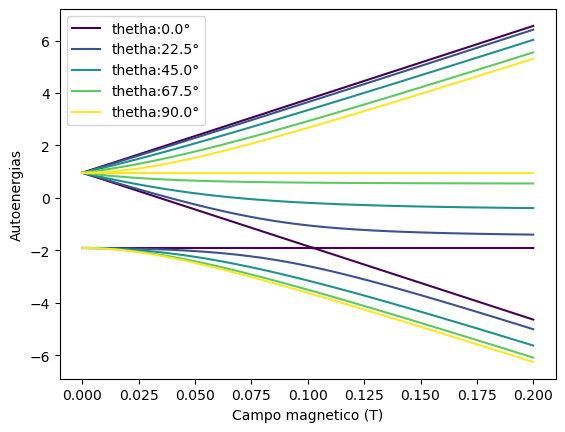

In [11]:
parametros_tetha = np.linspace(0, 90,num=5)
colormap = plt.get_cmap('viridis', len(parametros_tetha))

for i,tetha_eval in enumerate(parametros_tetha):
    
    # Advertencia ////// No poner E_eval = 0 //// Mi función no esta preparado para ese valor
    autoenergias = autoenergias_calc(B_ini=0,B_fin=2*10**(-1),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 0*(np.pi/180),E_eval = 2*10**(-3))
    
    print(f'funciono{i}')
    
    color_val = colormap(i)  # Seleccionar un color de la lista de colores
    plt.plot(autoenergias[0],autoenergias[3],color= color_val)
    plt.plot(autoenergias[0],autoenergias[2],color= color_val)
    plt.plot(autoenergias[0],autoenergias[1],color= color_val,label=f'thetha:{tetha_eval}°')
    
plt.ylabel('Autoenergias')
plt.xlabel('Campo magnetico (T)')
# plt.title('Figura2')
plt.legend()
#plt.savefig("autoenergiasVScampo_magnetico_para_distintos_theta")
plt.show()

## Frecuencias de transición vs campo magnetico / $\theta \neq0$ y $\varphi = 0$

- Se quiere visualizar como cambia las frecuencias de transición al cambiar los angulos latitud

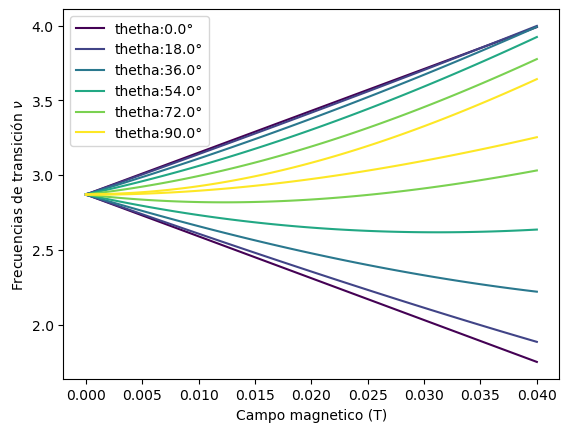

In [21]:
# Definir una lista de colores utilizando un mapa de colores
parametros_tetha = np.linspace(0, 90, num=6)
colormap = plt.get_cmap('viridis', len(parametros_tetha))

for i,tetha_eval in enumerate(parametros_tetha):
    frecuencias = frecuencias_calc(B_ini=0,B_fin=40*10**(-3),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 15*(np.pi/180),E_eval = 2*10**(-3))
    
    color_val = colormap(i)  # Seleccionar un color de la lista de colores
    plt.plot(frecuencias[0],frecuencias[2],color= color_val)   
    plt.plot(frecuencias[0],frecuencias[1],color= color_val,label=f'thetha:{tetha_eval}°')
    
plt.ylabel(r'Frecuencias de transición $\nu$')
plt.xlabel('Campo magnetico (T)')
# plt.title('Figura3')
plt.legend()
# plt.savefig("frecuenciasVScampo_magnetico_para_distintos_theta")
plt.show()

## Agregando la aproximación
\begin{equation}
    \nu_{\pm}(B_{NV}) = D \pm \sqrt{\left(\gamma B_{NV}\right)^2 + E^2}
    \label{frecuencia-aproximación-debil}
\end{equation}

In [22]:
def frecuencias_aprox(B_ini=-500*10**(-6),B_fin=500*10**(-6),pasos=100,theta=2*(np.pi/180),phi = 0*(np.pi/180),E_eval = 2*10**(-3)):
    '''
    Esta función retorna 3 arrays 
    1er array : El campo magnetico 
    2do array : Las frecuencias menor de transición
    3er array : Las frecuencias mayor de transición
    '''
    
    array1 = []
    array2 = []
    array3 = []
    
    for Bvalor in np.linspace(B_ini,B_fin,pasos):
        # Variables 
        Beval = Bvalor 
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        # formamos una lista reducida
        frecuencias_transicion = [D_eval + np.sqrt( (gamma_eval*Bz_eval)**2 + E_eval**2), D_eval - np.sqrt( (gamma_eval*Bz_eval)**2 + E_eval**2)]
        
        np.array( array1.append(Bvalor) )
        np.array( array2.append(frecuencias_transicion[0]) )
        np.array( array3.append(frecuencias_transicion[1]) )
        
    return np.array([array1,array2,array3])

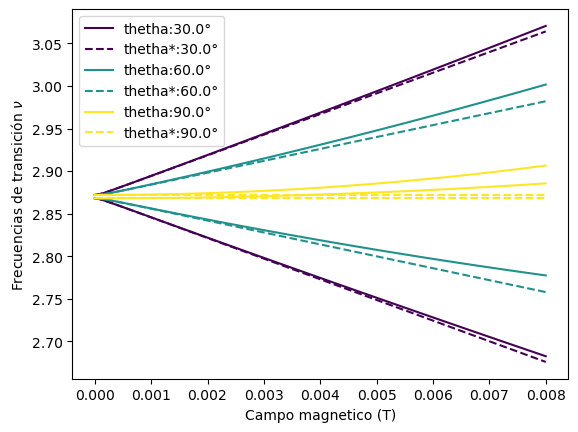

In [25]:
# Definir una lista de colores utilizando un mapa de colores
parametros_tetha = np.linspace(30, 90, num=3)
colormap = plt.get_cmap('viridis', len(parametros_tetha))

for i,tetha_eval in enumerate(parametros_tetha):
    frecuencias = frecuencias_calc(B_ini=0,B_fin=8*10**(-3),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 15*(np.pi/180),E_eval = 2*10**(-3))
    frecuencias_cal = frecuencias_aprox(B_ini=0,B_fin=8*10**(-3),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 15*(np.pi/180),E_eval = 2*10**(-3))
    
    color_val = colormap(i)  # Seleccionar un color de la lista de colores
    plt.plot(frecuencias[0],frecuencias[2],color= color_val)   
    plt.plot(frecuencias[0],frecuencias[1],color= color_val,label=f'thetha:{tetha_eval}°')
    
    plt.plot(frecuencias_cal[0],frecuencias_cal[2],'--',color= color_val)   
    plt.plot(frecuencias_cal[0],frecuencias_cal[1],'--',color= color_val,label=f'thetha*:{tetha_eval}°')
    
plt.ylabel(r'Frecuencias de transición $\nu$')
plt.xlabel('Campo magnetico (T)')
# plt.title('Figura3')
plt.legend()
# plt.savefig("frecuenciasVScampo_magnetico_para_distintos_theta")
plt.show()

## Calculo de B y $\Delta$ en función de frecuencias de transición $\nu_{+}$ y $\nu_{-}$
Las ecuaciones a comprobar 
\begin{align}
B &= \frac{1}{\gamma}\left( \frac{1}{3}(\nu_{+}^2 + \nu_{-}^2 - \nu_{+}\nu_{-} - D^2) - E^2\right)^{1/2} \\
\Delta &= \frac{2(\nu_{-}+\nu_{+})(2(\nu_{+}^2 + \nu_{-}^2) - 5\nu_{-}\nu_{+})-3D(\nu_{+}^2 + \nu_{-}^2 - \nu_{+}\nu_{-} + 9E^2) + 7D^3
}{9(\nu_{+}^2 + \nu_{-}^2 - \nu_{+}\nu_{-} - D^2 - 3E^2)}
\end{align}

donde $\Delta = D\cos(2\theta) + 2E\cos(2\varphi)\sin^2(\theta)$

E=2.0 MHz
theta = 0.7853981633974483°
phi = 0.5235987755982988°


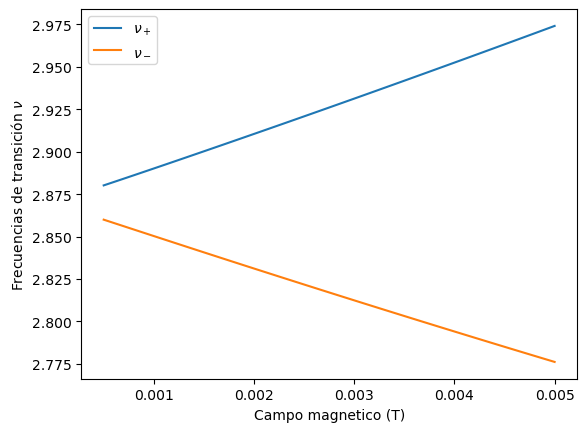

In [14]:
# calculemos un caso particular
E_eval = 2*10**(-3)
theta_eval_valor = 45*(np.pi/180)
phi_eval_valor = 30*(np.pi/180)
print(f'E={E_eval_valor*10**(3)} MHz')
print(f'theta = {theta_eval_valor}°')
print(f'phi = {phi_eval_valor}°')
Barray,nu_plus_array,nu_minus_array = frecuencias_calc(B_ini=0.5*10**(-3),B_fin=5*10**(-3),pasos=100,theta=theta_eval_valor,
                               phi = phi_eval_valor,E_eval = E_eval)
## Comparemos si es lo mismo f1 y f2
plt.plot(Barray,nu_plus_array,label= r"$\nu_+$")   
plt.plot(Barray,nu_minus_array,label= r"$\nu_-$")
plt.ylabel(r'Frecuencias de transición $\nu$')
plt.xlabel('Campo magnetico (T)')
# plt.title('Fig-2.5')
plt.legend()
plt.show()

### Comprobando
\begin{align}
f1 &= B \\
f2 &= \frac{1}{\gamma}\left( \frac{1}{3}(\nu_{+}^2 + \nu_{-}^2 - \nu_{+}\nu_{-} - D^2) - E^2\right)^{1/2} \\
\end{align}

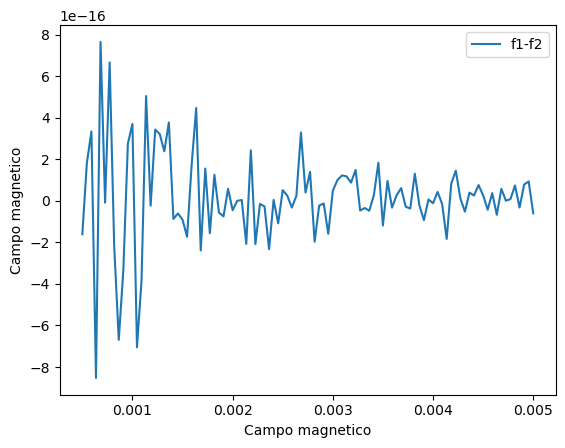

In [15]:
## Comparemos si es lo mismo f1 y f2
# Definición de función 1
def f1(B):
    return B

# Definición de función 2
def f2(nu_plus = 0,nu_minus = 0):
    return (1/gamma_eval)*(1/3*(nu_plus**2 + nu_minus**2 - nu_plus*nu_minus - D_eval**2) - E_eval**2)**(0.5)

plt.plot(Barray,f1(B=Barray) - f2(nu_plus= nu_plus_array,nu_minus=nu_minus_array),label= r"f1-f2")   
plt.ylabel(r'Campo magnetico')
plt.xlabel('Campo magnetico')
plt.legend()
plt.show()

### Comprobando 
\begin{align}
f3 &= \Delta  = D\cos(2\theta) + 2E\cos(2\varphi)\sin^2(\theta) \\
f4 &= \frac{2(\nu_{-}+\nu_{+})(2(\nu_{+}^2 + \nu_{-}^2) - 5\nu_{-}\nu_{+})-3D(\nu_{+}^2 + \nu_{-}^2 - \nu_{+}\nu_{-} + 9E^2) + 7D^3
}{9(\nu_{+}^2 + \nu_{-}^2 - \nu_{+}\nu_{-} - D^2 - 3E^2)}
\end{align}

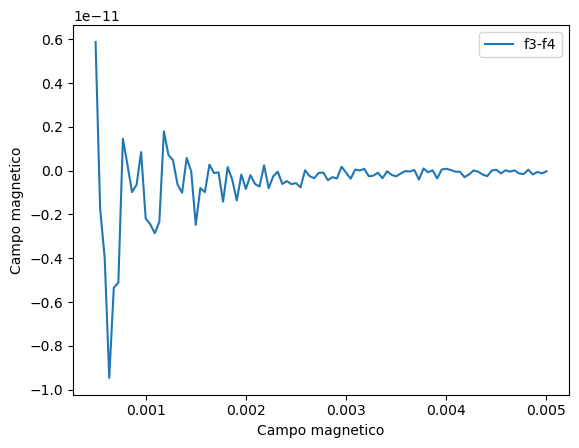

In [16]:
# Definición de función 3
def f3(theta=0,phi=0):
    return D_eval*np.cos(2*theta) + 2*E_eval*np.cos(2*phi)*(np.sin(theta))**2

# definición de función 4
# Puedes modificar para ver la aproimacion
def f4(nu_plus = 0,nu_minus = 0):
    numerador = 2*(nu_plus + nu_minus)*(2*(nu_plus**2 + nu_minus**2) - 5*nu_minus*nu_plus  )  \
               - 3*D_eval*(nu_plus**2 + nu_minus**2 - nu_minus*nu_plus + 9*E_eval**2) + 7*D_eval**3
    denominador = 9*(nu_plus**2 + nu_minus**2 - nu_minus*nu_plus - D_eval**2 - 3*E_eval**2)
    return (numerador/denominador)

plt.plot(Barray,f3(theta=theta_eval_valor,phi=phi_eval_valor) - f4(nu_plus= nu_plus_array,nu_minus=nu_minus_array)  ,label= r"f3-f4")   
plt.ylabel(r'Campo magnetico')
plt.xlabel('Campo magnetico')
plt.legend()
plt.show()

# Modulo de coeficientes para los autovectores vs $(B, \theta)$ / con $\varphi = 0$

- Se quiere visualizar en que rango se puede confiar en que los autectores de $S_z$ son buenos representantes para la física del sistema. 

In [16]:
E_eval = 0.005
Y = np.linspace(0, 90,num=100)
X = np.linspace(1*10**(-3),200*10**(-3),100) # tiene que ser maximo 100 porque despues de ese valor ocurre un intercruce 
                                    # y alli mi analisis carece de sentido

B_eval, theta_eval = np.meshgrid(X, Y)   
ejey, ejex = B_eval.shape # extraemos la longitud del eje x y eje y
print(f"El eje x tiene {ejex} valores")
print(f"El eje y tine {ejey} valores")
print(f"El valor de E: {E_eval}")

# una matriz que tenga las mismas dimensiones
Z0 = np.zeros((ejey, ejex)) # populación de \ket{0} asociado al autovalor menor
Z1 = np.zeros((ejey, ejex)) # populación de \ket{-1} asociado al autovalor medio 
Z2 = np.zeros((ejey, ejex)) # populacoón de \ket{+1} asociado al autovalor mayor 


# Definir la cantidad total de iteraciones
total_iteraciones = ejex

# Inicializar la barra de progreso
barra_progreso = tqdm(total=total_iteraciones, desc="Procesando")

# calculamos autovectores 
for j in np.arange(0,ejex):
    for i in np.arange(0,ejey):
        # calcular los autovectores para las autoenergias en orden creciente 
        
        # Variables 
        Beval = B_eval[i,j]
        theta = theta_eval[i,j]*(np.pi/180)
        phi = 0
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        Heval = H.subs({D:D_eval, E:E_eval, gamma:gamma_eval, B_x:Bx_eval, B_y:By_eval, B_z:Bz_eval}) # reemplazando
        
        # Calcular autovalores y autovectores
        autovalores = Heval.eigenvals()
        autovectores = Heval.eigenvects()
        
        #print(autovectores)
        #print("*")
        # Ordenar los autovalores y autovectores de menor a mayor
        autovectores = sorted(autovectores) # La función sorted ordena los autovectores y los autovalores
        autovectores_ordenados = [autovectores[i][2][0] for i in range(len(autovectores))]
        #print(autovectores)
        
        Z0[i,j] = abs(autovectores_ordenados[0][1])**2 # El menor autovalor es el \ket{0} por eso [0][1]
        Z1[i,j] = abs(autovectores_ordenados[1][2])**2 # 
        Z2[i,j] = abs(autovectores_ordenados[2][0])**2 # este es el mayor autovalores es \ket{+1}
        #print(B_eval[i,j],theta_eval[i,j],Z0[i,j])
        #print("-"*20)
    
    barra_progreso.update(1) # actualizamos la barra de progreso
    

# Cerrar la barra de progreso cuando haya terminado
barra_progreso.close()

El eje x tiene 100 valores
El eje y tine 100 valores
El valor de E: 0.005


Procesando: 100%|████████████████████████████████████████████████████████████████████| 100/100 [22:21<00:00, 13.42s/it]


In [17]:
barra_progreso.close() # en caso de no cerrar bien entonces correr este codigo

## Población del $|0\rangle$ para el autovalor de menor energia

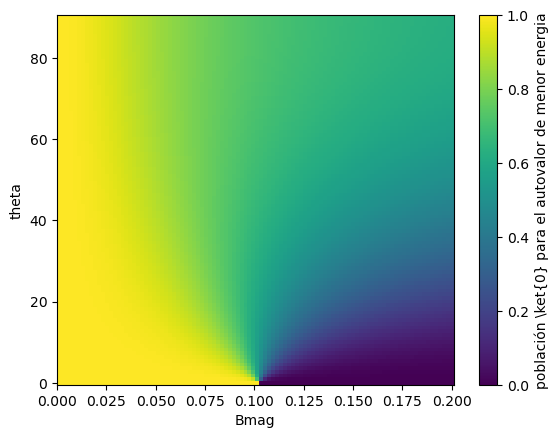

In [18]:
plt.pcolormesh(B_eval, theta_eval, Z0, cmap='viridis', shading='auto')
plt.colorbar(label='población \ket{0} para el autovalor de menor energia')
plt.xlabel('Bmag')
plt.ylabel('theta')
# plt.title('figura4')
# plt.savefig("población_ket0_para_el_autovalor_de_menor_energiaE=5MHz.png")
plt.show()

## Población del $|-1\rangle$ para el autovalor de energia intermedia 

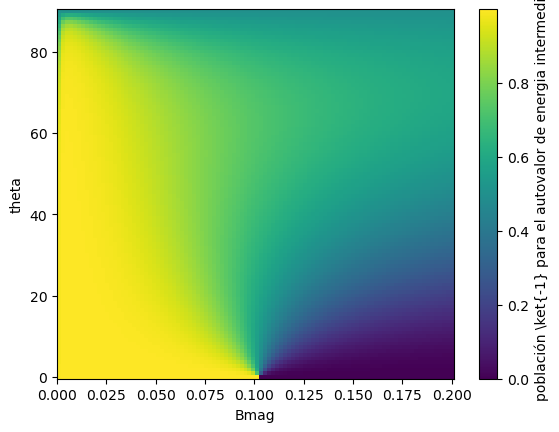

In [19]:
plt.pcolormesh(B_eval, theta_eval, Z1, cmap='viridis', shading='auto')
plt.colorbar(label='población \ket{-1} para el autovalor de energia intermedia')
plt.xlabel('Bmag')
plt.ylabel('theta')
# plt.title('figura5')
# plt.savefig("población_ket-1_para_el_autovalor_de_energia_intermediaE=5MHz.png")
plt.show()

## Población del $|+1\rangle$ para el autovalor de mayor energia

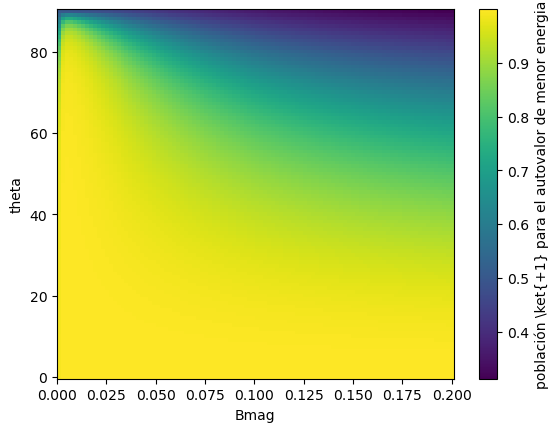

In [20]:
plt.pcolormesh(B_eval, theta_eval, Z2, cmap='viridis', shading='auto')
plt.colorbar(label='población \ket{+1} para el autovalor de menor energia')
plt.xlabel('Bmag')
plt.ylabel('theta')
# plt.title('figura6')
# plt.savefig("población-ket1_para_el_autovalor_de_menor_energiaE=5MHz.png")
plt.show()